# Dealing with High Dimensional Data

We are going to try different feature selectors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: High Dimensional Data

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 10000,
    n_features =200, 
    n_classes=2,
    random_state=123)

In [3]:
print ("X.shape :", X.shape)
print ("y.shape :", y.shape)
print ("y labels :", np.unique(y))

# print some sample data, row 0
print (X[0])

X.shape : (10000, 200)
y.shape : (10000,)
y labels : [0 1]
[ 0.06402486 -0.98061593 -1.18883537 -0.51764847 -0.82179227  0.0739652
  1.44180342  0.19518421 -0.29517086  1.47912689 -0.71346016  2.27275175
  0.28846036 -0.85953266 -0.1726296  -0.85107848 -0.95317766 -2.00699533
 -0.31136413 -0.7217688   0.13594839  0.33877825 -0.19495469 -0.76098685
  0.39539052  0.40980633 -0.60746196  0.98047923  0.1500861  -0.05655616
 -0.13474669  1.03574626 -2.29733106 -0.80930129 -0.69837076  0.60693337
  1.11681786 -0.36264125  0.88164179 -0.28123448 -0.25376441 -0.44192162
  0.39608794  0.31059178  0.8104255  -1.96554892 -1.09859579  0.03105522
 -0.07453454  1.318829   -0.95275898  2.00532532  0.39633251 -0.66545447
  0.20218599 -1.30227946  0.01582459  0.75926255 -0.6900173  -0.24935142
 -0.38016661 -0.99870114  0.05998168  0.53265137  0.24895892 -0.9193293
  0.03199864 -1.62689223  0.802138   -0.96420766 -0.89326835 -1.23573376
 -0.04185463 -0.09536766  0.74000348 -0.57833403 -0.89306309  1.121

In [4]:
# Let's select the following components
## TODO: change this and see the accuracy 
number_of_fetures_to_select = 20

## Scale Data

Scaling could be helpful

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()

X_scaled = scaler.fit_transform(X)
print (X_scaled[0])

[ 0.04770272 -0.98658802 -1.18344408 -0.5183699  -0.80923477  0.0859903
  1.42009405  0.20030586 -0.29378248  1.46814489 -0.69634149  2.30114892
  0.27919382 -0.87524643 -0.17578529 -0.85687621 -0.9525012  -2.02582782
 -0.32641631 -0.72053224  0.15226315  0.35694245 -0.19734155 -0.74651541
  0.40287909  0.41156388 -0.58746466  0.98508857  0.14742188 -0.05019948
 -0.11991529  1.04390248 -2.29950898 -0.79466717 -0.68918474  0.5946041
  1.11689857 -0.35777014  0.88653489 -0.26495005 -0.24280115 -0.45757415
  0.37048396  0.30909569  0.81830433 -1.96304863 -1.08863354  0.04133296
 -0.06475763  1.30836774 -0.93787528  2.02650904  0.40977975 -0.67020634
  0.21012081 -1.30353674  0.02537702  0.7531799  -0.67726781 -0.2538229
 -0.38373184 -1.01560314  0.06221751  0.53654089  0.26124819 -0.92173107
  0.02082859 -1.62358882  0.80719164 -0.96539627 -0.88632467 -1.23655713
 -0.03004084 -0.0900905   0.73178283 -0.58097747 -0.8967538   1.11118355
  0.65790279  0.52865891  0.32406436  0.69701246 -0.51

## Step-2 : Train / Test Split

In [6]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train1,X_test1,y_train, y_test = train_test_split(X_scaled, y,  test_size=0.2, random_state=123)


print ("x_train1 :" , X_train1.shape )
print ("x_test1 :", X_test1.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train1 : (8000, 200)
x_test1 : (2000, 200)
y_train : (8000,)
y_test : (2000,)


## Step-3: Do a quick logistic regression on **all** data

In [7]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

algo = LogisticRegression()
# algo = RandomForestClassifier()
#algo = LinearSVC(max_iter=5000)
#algo = GradientBoostingClassifier()


## TODO: fit (X_train, y_train)
model1 = algo.fit(X_train1, np.ravel(y_train))

CPU times: user 107 ms, sys: 9.33 ms, total: 116 ms
Wall time: 71.2 ms


## Step-4: Evaluate

In [8]:
y_pred1 = model1.predict (X_test1)

print ("Train1 accuracy: ", model1.score(X_train1,y_train))
print ("Test1 accuracy: ", model1.score(X_test1, y_test))

Train1 accuracy:  0.93775
Test1 accuracy:  0.918


In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array1 = confusion_matrix(y_test, y_pred1)
#print (cm_array)

cm_df1 = pd.DataFrame(cm_array1, index=cm_labels, columns=cm_labels)
cm_df1

,0,1
0,937,68
1,96,899


[]

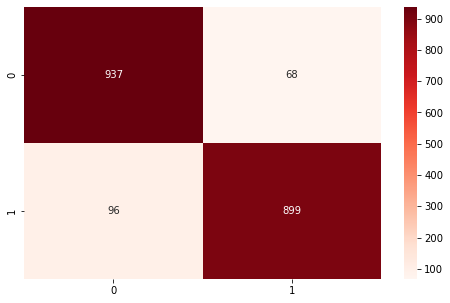

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df1, annot=True, cmap="Reds", fmt='d').plot()

## Step-5 : Reduce Dimension

We will try a few algorithms here.


### 5.1 - RFE

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [11]:
from sklearn.feature_selection import RFE

# Defining the Classification function
estimator = LogisticRegression()

# Reducing dimensionality to 250 features for backward elimination model
feature_selector = RFE(estimator=estimator, n_features_to_select=number_of_fetures_to_select, verbose=0)

### 5.2 - SelectKBest

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [12]:
# from sklearn.feature_selection import SelectKBest

# feature_selector = SelectKBest(k=number_of_fetures_to_select)

### 5.3 - PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [13]:
# from sklearn.decomposition import PCA

# feature_selector = PCA (n_components=number_of_fetures_to_select)

### 5.4 - FastICA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html?

In [14]:
# from sklearn.decomposition import FastICA

# feature_selector = FastICA(n_components=number_of_fetures_to_select, max_iter=1000, random_state=123) 

### 5.5 - Factor Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [15]:
# # Defining the number of factors
# from sklearn.decomposition import FactorAnalysis

# feature_selector = FactorAnalysis(n_components = number_of_fetures_to_select,random_state=123)

### Run Feature Selector

In [16]:
%%time

feature_selector = feature_selector.fit(X, y)

CPU times: user 20.5 s, sys: 338 ms, total: 20.8 s
Wall time: 2.63 s


## Step-6: Which features were selected?

In [17]:
# print indexes of features selected

feature_selector.get_support(indices = True)

## Step-7: Shape train/test with Feature Selector

In [18]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train2 = feature_selector.transform(X_train1)

X_test2 = feature_selector.transform(X_test1)

print ("x_train1:" , X_train1.shape )
print ("x_train2 :" , X_train2.shape )
print ("x_test1:", X_test1.shape)
print ("x_test2 :", X_test2.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train1: (8000, 200)
x_train2 : (8000, 20)
x_test1: (2000, 200)
x_test2 : (2000, 20)
y_train : (8000,)
y_test : (2000,)


## Step-8: Let's do LR again

In [19]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

algo = LogisticRegression()
# algo = RandomForestClassifier()
#algo = LinearSVC(max_iter=5000)
#algo = GradientBoostingClassifier()


## TODO: fit (X_train, y_train)
model2 = algo.fit(X_train2, np.ravel(y_train))

CPU times: user 51.9 ms, sys: 3.83 ms, total: 55.7 ms
Wall time: 6.94 ms


In [20]:
y_pred2 = model2.predict (X_test2)

print ("Train accuracy 1: ", model1.score(X_train1,y_train))
print ("Train accuracy 2: ", model2.score(X_train2,y_train))
print ("Test accuracy 1: ", model1.score(X_test1, y_test))
print ("Test accuracy 2: ", model2.score(X_test2, y_test))

Train accuracy 1:  0.93775
Train accuracy 2:  0.93425
Test accuracy 1:  0.918
Test accuracy 2:  0.935


In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array2 = confusion_matrix(y_test, y_pred2)
#print (cm_array)

cm_df2 = pd.DataFrame(cm_array2, index=cm_labels, columns=cm_labels)

In [22]:
print ("Confusion matrix 1 ")
cm_df1

Confusion matrix 1 


,0,1
0,937,68
1,96,899


In [23]:
print ("Confusion matrix 2 ")
cm_df2

Confusion matrix 2 


,0,1
0,956,49
1,81,914


[]

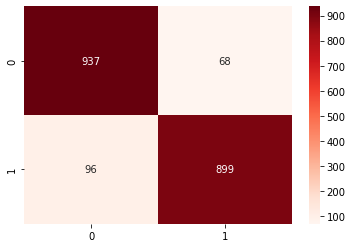

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df1, annot=True, cmap="Reds", fmt='d').plot()

[]

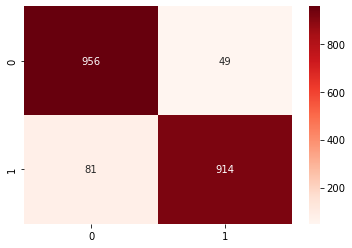

In [25]:
sns.heatmap(cm_df2, annot=True, cmap="Reds", fmt='d').plot()